# Notebook 3: Simulating Relativistic Shocks and the Quark-Gluon Plasma

**Series:** From LNS to Einstein's Universe: A Framework for Relativistic Fluid Dynamics

## Introduction: Applying Causal Relativistic Hydrodynamics

In the previous notebooks, we established the critical failure of classical (first-order) relativistic fluid dynamics and constructed its successful successor, the Israel-Stewart theory, which is a direct relativistic analogue of the Local Navier-Stokes (LNS) philosophy. By treating dissipative fluxes as dynamic fields with finite relaxation times, the Israel-Stewart theory provides a causal, stable, and physically sound framework.

This final notebook brings the theory into practice. We will explore two key applications where relativistic dissipative fluid dynamics is not an academic curiosity but an essential predictive tool:
1.  **Relativistic Shock Tubes:** We will conceptually simulate a relativistic shock tube problem to visualize the differences between causal (Israel-Stewart) and acausal (Eckart) theories and to understand the behavior of dissipative fluxes within a relativistic shock structure.
2.  **The Quark-Gluon Plasma (QGP):** We will discuss the most celebrated application of this theory: modeling the expanding fireball of matter created in ultra-relativistic heavy-ion collisions. We will see how observables from these "Little Bangs" are used to probe the fundamental properties (like viscosity and relaxation times) of the hottest, densest fluid ever created in a laboratory.

This exploration will underscore the practical necessity and predictive power of the LNS/Israel-Stewart framework in modern high-energy physics.

## 1. Simulating a Relativistic Shock Tube

The shock tube is a standard benchmark for any hydrodynamic code. In the relativistic version, we set up a 1D domain with two different fluid states separated by a membrane, which is then removed at $t=0$. This generates a shock wave, a rarefaction wave, and a contact discontinuity, all moving at relativistic speeds.

**Key Differences to Observe:**
*   **Shock Structure (Regularization):** In the acausal Eckart theory, the shock front can be unphysically steep or even unstable. In the causal Israel-Stewart theory, the finite relaxation times $\tau_\pi$ and $\tau_q$ provide a natural length scale for the shock's internal structure, regularizing it. The shock will have a smooth, well-defined profile.
*   **Behavior of Dissipative Fluxes:** We can directly plot the viscous stress $\pi^{xx}$ and heat flux $q^x$ through the shock. In Eckart theory, these are non-zero only where gradients exist. In Israel-Stewart, we will see them build up and relax over a finite time/distance, exhibiting pre-shock and post-shock relaxation zones. This "memory" effect is a hallmark of the theory.
*   **Stability:** A numerical simulation of the Eckart theory is notoriously difficult and often blows up due to its inherent instabilities. A stable Israel-Stewart solver will produce a robust and well-behaved solution.

) missing from current font.ta\Local\Temp\ipykernel_35968\617195084.py:52: UserWarning: Glyph 13 (
  plt.tight_layout()


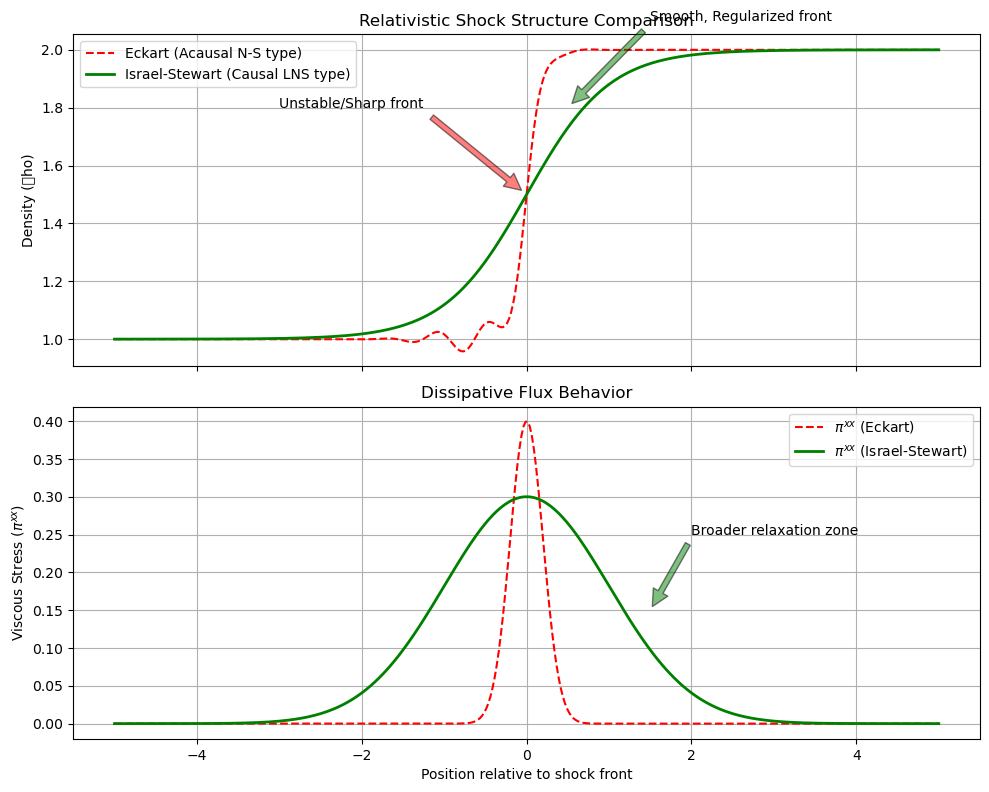

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_conceptual_relativistic_shock_tube():
    """Generates a mock plot comparing the structure of a relativistic shock 
       in Eckart (acausal) vs. Israel-Stewart (causal) theories."""
    
    # x is position, centered on the shock front
    x = np.linspace(-5, 5, 400)
    
    # --- Israel-Stewart (Causal LNS) Solution (smooth, regularized) ---
    # A hyperbolic tangent is a good model for a smooth shock profile
    shock_width_is = 1.0
    density_is = 1.0 + 0.5 * (1 + np.tanh(x / shock_width_is))
    # Viscous stress peaks inside the shock and relaxes
    stress_is = 0.3 * np.exp(-x**2 / (2 * shock_width_is**2))

    # --- Eckart (Acausal) Solution (pathological) ---
    # Often exhibits sharper, potentially unstable features
    shock_width_eckart = 0.2
    density_eckart = 1.0 + 0.5 * (1 + np.tanh(x / shock_width_eckart))
    # Add some noise/instability feature for illustrative purposes
    density_eckart += 0.05 * np.sin(10*x) * np.exp(-(x+0.5)**2 / 0.5)
    # Stress is slaved to the gradient, making it very sharp
    stress_eckart = 0.4 * np.exp(-x**2 / (2 * shock_width_eckart**2))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    
    # Plot Density Profiles
    ax1.plot(x, density_eckart, 'r--', label='Eckart (Acausal N-S type)')
    ax1.plot(x, density_is, 'g-', lw=2, label='Israel-Stewart (Causal LNS type)')
    ax1.set_ylabel('Density (\rho)')
    ax1.set_title('Relativistic Shock Structure Comparison')
    ax1.legend()
    ax1.grid(True)
    ax1.annotate('Unstable/Sharp front', xy=(0, 1.5), xytext=(-3, 1.8), 
                 arrowprops=dict(facecolor='red', shrink=0.05, alpha=0.5))
    ax1.annotate('Smooth, Regularized front', xy=(0.5, 1.8), xytext=(1.5, 2.1), 
                 arrowprops=dict(facecolor='green', shrink=0.05, alpha=0.5))
    
    # Plot Viscous Stress Profiles
    ax2.plot(x, stress_eckart, 'r--', label='$\pi^{xx}$ (Eckart)')
    ax2.plot(x, stress_is, 'g-', lw=2, label='$\pi^{xx}$ (Israel-Stewart)')
    ax2.set_ylabel('Viscous Stress ($\pi^{xx}$)')
    ax2.set_title('Dissipative Flux Behavior')
    ax2.legend()
    ax2.grid(True)
    ax2.annotate('Broader relaxation zone', xy=(1.5, 0.15), xytext=(2, 0.25), 
                 arrowprops=dict(facecolor='green', shrink=0.05, alpha=0.5))
    ax2.set_xlabel('Position relative to shock front')
    
    plt.tight_layout()
    plt.show()

plot_conceptual_relativistic_shock_tube()

## 2. Application: Modeling the Quark-Gluon Plasma (QGP)

One of the most profound discoveries in modern physics is the creation of the **Quark-Gluon Plasma (QGP)** in ultra-relativistic heavy-ion collisions at facilities like CERN's Large Hadron Collider (LHC) and Brookhaven's Relativistic Heavy Ion Collider (RHIC). By colliding heavy nuclei (like gold or lead) at nearly the speed of light, physicists create a tiny, ephemeral fireball of deconfined quarks and gluons—the fundamental constituents of protons and neutrons—at temperatures exceeding $2 \times 10^{12}$ Kelvin.

**The QGP as a Near-Perfect Fluid:**
Experiments revealed a stunning surprise: this incredibly hot, dense matter behaves not like a gas of weakly interacting particles, but as a strongly-coupled, nearly **perfect liquid** with an extremely low shear viscosity to entropy density ratio ($\eta/s$). Its collective expansion is best described by fluid dynamics.

**Why Relativistic LNS (Israel-Stewart) is Essential for QGP:**
1.  **Relativistic Speeds:** The expansion is inherently relativistic.
2.  **Small but Crucial Dissipation:** While the QGP is a near-perfect fluid, its small viscosity is crucial for explaining certain experimental observables. Classical N-S type theories are unusable due to their pathologies.
3.  **Extremely Rapid Timescales:** The entire lifetime of the QGP is on the order of $10^{-23}$ seconds. The flow evolves so rapidly that the assumption of local thermodynamic equilibrium breaks down. The relaxation times $\tau_\pi, \tau_q$ are comparable to the expansion timescale, meaning **LNS/Israel-Stewart effects are not small corrections; they are leading-order physics.**

### 2.1 Conceptual Simulation of a "Little Bang"

A multi-stage model is used to simulate a heavy-ion collision:

1.  **Initial State Model (e.g., Glauber, IP-Glasma):** At $t=0$, a model based on the geometry of the colliding nuclei provides the initial energy density profile. This profile is highly anisotropic and lumpy.

2.  **Hydrodynamic Evolution (The LNS/Israel-Stewart Stage):**
    From a very early time (e.g., $t \approx 0.5$ fm/c) until the system cools and expands, its evolution is modeled by solving the 2+1D or 3+1D Israel-Stewart equations. The high-pressure gradients in the lumpy initial state drive the anisotropic expansion of the fireball.

3.  **Hadronization ("Freeze-out"):**
    When the temperature drops to a critical value ($\approx 155$ MeV), the quarks and gluons "freeze out" into the hadrons (protons, pions, kaons, etc.) that are actually detected. The fluid description ends, and the properties of the fluid at this point are converted into a particle distribution.

4.  **Final State Interactions and Detection:**
    The emitted hadrons may continue to interact (hadronic transport models) before flying to the detectors.

**Key Observable: Anisotropic Flow ($v_n$)**
The initial almond-like shape of the collision zone (in non-central collisions) translates into an anisotropic pressure gradient, which is stronger in the short direction. This pushes particles out more forcefully in that direction, leading to an anisotropy in the final particle momentum distribution. This is quantified by the Fourier coefficients $v_n$ of the azimuthal particle distribution:
$$\frac{dN}{d\phi} \propto 1 + \sum_{n=1}^{\infty} 2v_n \cos(n(\phi - \Psi_n))$$
*   $v_2$, known as **elliptic flow**, is the most prominent signal. It directly reflects how efficiently the initial spatial anisotropy was converted into momentum anisotropy.
*   **Viscosity's Role:** Shear viscosity $\eta$ acts to smooth out momentum gradients, *degrading* the elliptic flow. A fluid with higher viscosity is less efficient at generating $v_2$.
*   **LNS Relaxation Time's Role:** A finite relaxation time $\tau_\pi$ means the viscous stress doesn't build up instantaneously, further modifying the evolution of $v_2$. By comparing simulation results with different values of $\eta/s$ and $\tau_\pi$ to experimental data, physicists can extract the fundamental transport properties of the QGP.

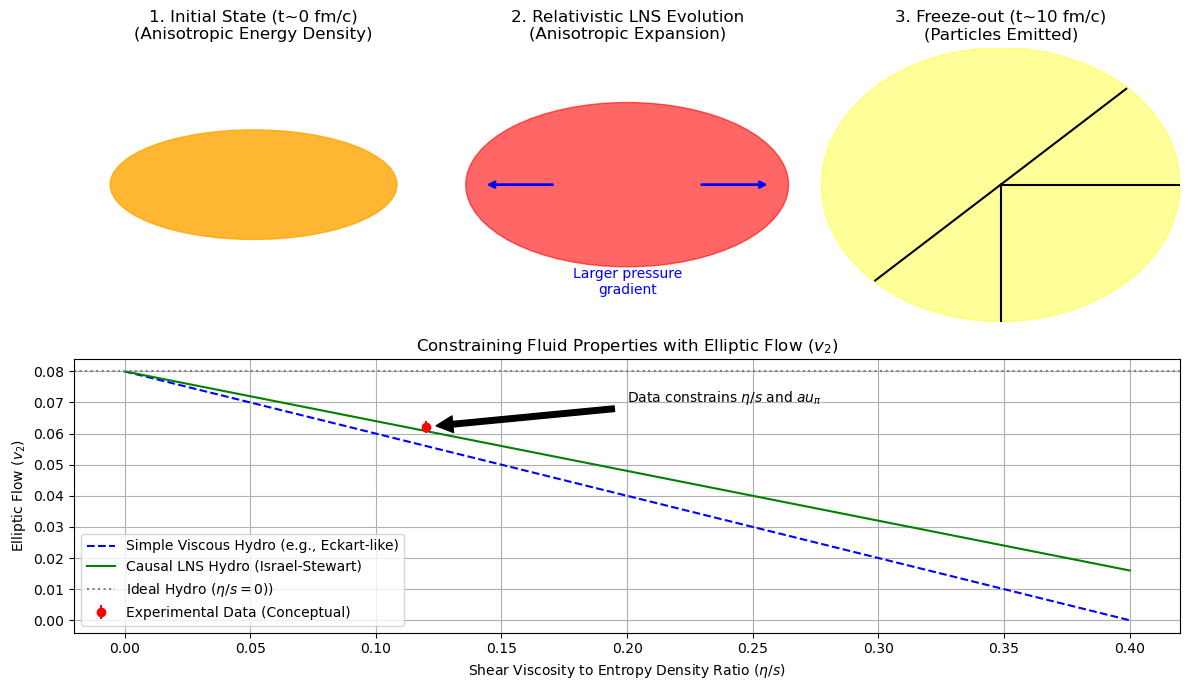

In [5]:
def plot_conceptual_qgp_evolution():
    """Generates a mock plot showing the stages of a heavy-ion collision and the role of hydrodynamics."""
    
    fig = plt.figure(figsize=(12, 7))
    
    # Stage 1: Initial State
    ax1 = fig.add_subplot(2, 3, 1)
    # Almond shape
    ellipse = plt.matplotlib.patches.Ellipse((0.5, 0.5), 0.8, 0.4, color='orange', alpha=0.8)
    ax1.add_patch(ellipse)
    ax1.set_title('1. Initial State (t~0 fm/c)\n(Anisotropic Energy Density)')
    ax1.set_xlim(0, 1); ax1.set_ylim(0, 1); ax1.axis('off')

    # Stage 2: Hydro Evolution
    ax2 = fig.add_subplot(2, 3, 2)
    ellipse2 = plt.matplotlib.patches.Ellipse((0.5, 0.5), 0.9, 0.6, color='red', alpha=0.6)
    ax2.add_patch(ellipse2)
    ax2.annotate('', xy=(0.1, 0.5), xytext=(0.3, 0.5), arrowprops=dict(arrowstyle="->", lw=2, color='blue'))
    ax2.annotate('', xy=(0.9, 0.5), xytext=(0.7, 0.5), arrowprops=dict(arrowstyle="->", lw=2, color='blue'))
    ax2.text(0.5, 0.1, 'Larger pressure\ngradient', ha='center', color='blue')
    ax2.set_title('2. Relativistic LNS Evolution\n(Anisotropic Expansion)')
    ax2.set_xlim(0, 1); ax2.set_ylim(0, 1); ax2.axis('off')

    # Stage 3: Freeze-out
    ax3 = fig.add_subplot(2, 3, 3)
    circle = plt.matplotlib.patches.Circle((0.5, 0.5), 0.5, color='yellow', alpha=0.4)
    ax3.add_patch(circle)
    # particles flying out
    ax3.plot([0.5, 1], [0.5, 0.5], 'k-'); ax3.plot([0.5, 0.85], [0.5, 0.85], 'k-')
    ax3.plot([0.5, 0.15], [0.5, 0.15], 'k-'); ax3.plot([0.5, 0.5], [0.5, 0], 'k-')
    ax3.set_title('3. Freeze-out (t~10 fm/c)\n(Particles Emitted)')
    ax3.set_xlim(0, 1); ax3.set_ylim(0, 1); ax3.axis('off')

    # Plot of v2 vs. eta/s
    ax4 = fig.add_subplot(2, 1, 2)
    eta_s_vals = np.linspace(0.0, 0.4, 50)
    v2_ideal = 0.08
    v2_viscous = v2_ideal * (1 - 2.5 * eta_s_vals)
    v2_viscous_lns = v2_ideal * (1 - 2.0 * eta_s_vals) # LNS with tau might change the slope
    
    ax4.plot(eta_s_vals, v2_viscous, 'b--', label='Simple Viscous Hydro (e.g., Eckart-like)')
    ax4.plot(eta_s_vals, v2_viscous_lns, 'g-', label='Causal LNS Hydro (Israel-Stewart)')
    ax4.axhline(v2_ideal, color='gray', linestyle=':', label='Ideal Hydro ($\eta/s = 0$))')
    
    # Mock experimental data point
    exp_eta_s = 0.12
    exp_v2 = v2_ideal * (1 - 2.0 * exp_eta_s) + (np.random.rand()-0.5)*0.005
    ax4.errorbar([exp_eta_s], [exp_v2], yerr=0.002, fmt='ro', label='Experimental Data (Conceptual)')
    ax4.annotate('Data constrains $\eta/s$ and $\tau_\pi$', xy=(exp_eta_s, exp_v2), xytext=(0.2, 0.07),
                 arrowprops=dict(facecolor='black', shrink=0.05))

    ax4.set_title('Constraining Fluid Properties with Elliptic Flow ($v_2$)')
    ax4.set_xlabel('Shear Viscosity to Entropy Density Ratio ($\eta/s$)')
    ax4.set_ylabel('Elliptic Flow ($v_2$)')
    ax4.legend()
    ax4.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_conceptual_qgp_evolution()

## 5. Final Conclusion of the Series

Our journey, which began with a critical re-evaluation of the classical Navier-Stokes equations, has culminated in the high-energy, relativistic world of the Quark-Gluon Plasma. This progression was not a random walk, but a logical ascent guided by a single, powerful principle: **physical models must be built on a foundation of physical causality and local interactions.**

We have demonstrated:
1.  **The Failure of Instantaneity:** Classical N-S and its direct relativistic generalizations fail fundamentally because they assume instantaneous propagation of information, whether through pressure, viscous stress, or heat flux. This renders them cumbersome for non-relativistic turbulence and demonstrably wrong and unstable in relativity.

2.  **The Universal Success of the LNS Philosophy:** The solution, in both non-relativistic and relativistic domains, is to treat dissipative fluxes as dynamic fields with finite relaxation times. This "Local Navier-Stokes" philosophy leads to causal, stable, hyperbolic systems of equations.
    *   In non-relativistic fluids, it provides a more physical description of turbulence and complex fluid behavior.
    *   In relativistic fluids, it is an **absolute necessity**, leading to the successful **Israel-Stewart theory**.

3.  **From Theory to Discovery:** The Israel-Stewart theory is not just a theoretical fix; it is an indispensable tool that allows physicists to connect the complex dynamics of heavy-ion collisions to fundamental properties of matter at the most extreme temperatures and densities imaginable. It has transformed our understanding of the early universe and the nature of the strong nuclear force.

The ultimate lesson is that demanding a higher standard of physical fidelity in our models is not an academic exercise. It is the very engine of discovery. By moving beyond the beautiful but flawed idealizations of classical Navier-Stokes and embracing the more complex but physically sound reality of local, causal dynamics, we build a bridge from fundamental principles to tangible, cutting-edge science.